In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from typing import Iterator

In [31]:
def read_jsonl(file_name: str) -> Iterator:
    with open(file_name, mode="r", encoding="utf-8") as f:
        for line in f:
            yield json.loads(line)

def read_results_file(fn):
    num_digits = []
    num_terms = []
    num_samples_total = 0

    for x in read_jsonl(fn):
        num_digits.append(x["num_digits"])
        num_terms.append(x["num_terms"])
        num_samples_total += 1

    num_digits_max = max(num_digits)
    num_digits_min = min(num_digits)
    num_terms_max = max(num_terms)
    num_terms_min = min(num_terms)

    h = num_digits_max-num_digits_min+1
    w = num_terms_max-num_terms_min+1
    solved = np.zeros((h, w), dtype=np.int32)
    counts = np.zeros_like(solved)

    for x in read_jsonl(fn):
        d = int(x["num_digits"]) - num_digits_min
        t = int(x["num_terms"]) - num_terms_min
        s = bool(x["solved"])
        if s:
            solved[d, t] += 1
        counts[d, t] += 1
        
    rates = solved / counts
    return rates, num_digits_min, num_digits_max, num_terms_min, num_terms_max

def plt_heatmap(title, rates, num_digits_min, num_digits_max, num_terms_min, num_terms_max):
    plt.figure(figsize=(6, 4))
    sns.heatmap(rates, 
                annot=True,  # Show values in cells
                fmt='.2f',   # Format to 2 decimal places
                cmap='viridis',  # Color scheme
                cbar=True,
                xticklabels=list(range(num_terms_min, num_terms_max+1)),
                yticklabels=list(range(num_digits_min, num_digits_max+1))
                )    # Show colorbar

    # Optional: Add title and labels
    plt.title(title)
    plt.xlabel('num_terms')
    plt.ylabel('num_digits')

    # Display the plot
    plt.tight_layout()
    plt.show()

def show_rates(fn):
    rates, num_digits_min, num_digits_max, num_terms_min, num_terms_max = read_results_file(fn)
    plt_heatmap(fn, rates, num_digits_min, num_digits_max, num_terms_min, num_terms_max)


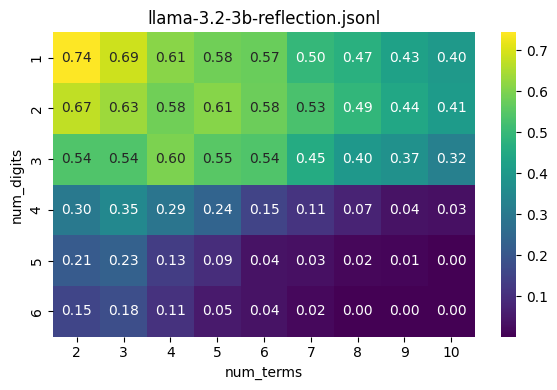

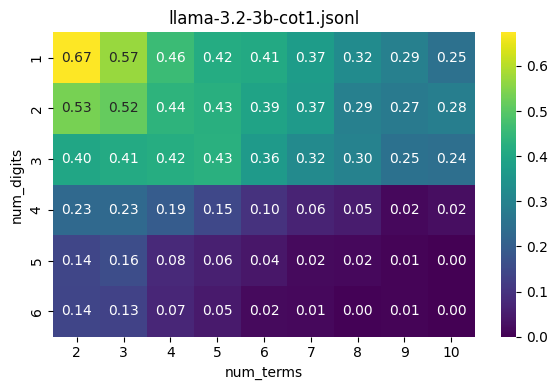

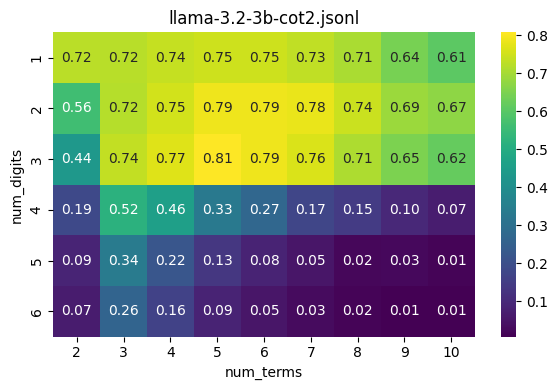

In [ ]:
fn = "llama-3.2-3b-reflection.jsonl"
show_rates(fn)

fn = "llama-3.2-3b-cot1.jsonl"
show_rates(fn)

fn = "llama-3.2-3b-cot2.jsonl"
show_rates(fn)
